In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# 1. Basic Plot

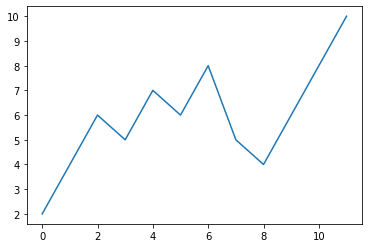

In [73]:
import matplotlib.pyplot as plt
data = [2,4,6,5,7,6,8,5,4,6,8,10]
plt.plot(data)            
plt.show()

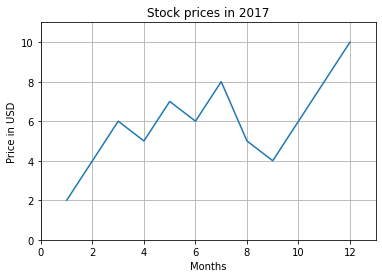

In [74]:
# import seaborn as sns  อีกธีมของกราฟ
# sns.set()

import matplotlib.pyplot as plt
data = [2,4,6,5,7,6,8,5,4,6,8,10]
months = range(1, len(data)+1)    # begin X (months) at 1 instead of 0
plt.plot(months,data)             # pass both X and Y list values to the plot
plt.title('Stock prices in 2017') # use the `title()` function and pass a string
plt.xlabel('Months')              # use the `xlabel()` function and pass a string
plt.ylabel('Price in USD')        # use the `ylabel()` function and pass a string
plt.axis([0,13,0,11])             # specify viewport with values [xmin,xmax,ymin,ymax]
plt.grid()                        # use the `grid()` function to turn on the axes grid
plt.show()

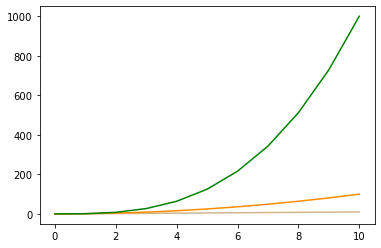

In [75]:
y1 = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
y2 = [0, 1, 4, 9, 16, 25, 36, 49, 64, 81, 100]
y3 = [0, 1, 8, 27, 64, 125, 216, 343, 512, 729, 1000]

plt.plot(y1, color='tan')        # plot the y1 sequence, with color='tan'
plt.plot(y2, color='darkorange') # plot the y2 sequence, with color='darkorange'
plt.plot(y3, color='green')      # plot the y3 sequence, with color='green'
plt.show()

# 2. Sub Plot

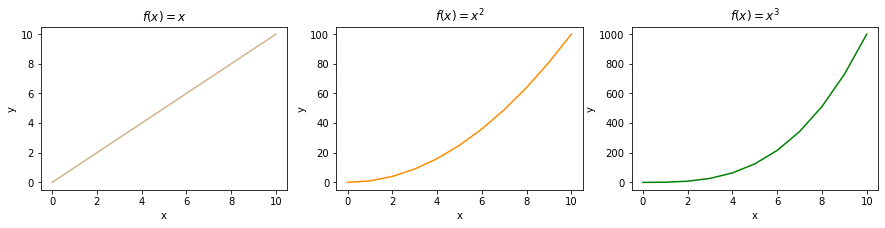

In [76]:

plt.figure(1, figsize=(15,3))    # first create 1 figure,                                # the figsize argument is a tuple of (width, height)
plt.subplot(1,3,1)               # 1 แถวมี 3 รูปพลอตลงรูปที่ 1 # numrows=1, numcols=3, fignum=1
plt.xlabel('x')
plt.ylabel('y')
plt.title(r'$f(x) = x$')

plt.plot(y1, color='tan')        # plot the y1 sequence
plt.subplot(1,3,2)               # 1 แถวมี 3 รูปพลอตลงรูปที่ 2 # numrows=1, numcols=3, fignum=2
plt.xlabel('x')
plt.ylabel('y')
plt.title(r'$f(x) = x^2$')       # scientific "TeX" notation for superscript
plt.plot(y2, color='darkorange') # plot the y2 sequence

plt.subplot(1,3,3)               # 1 แถวมี 3 รูปพลอตลงรูปที่ 3 # numrows=1, numcols=3, fignum=3
plt.xlabel('x')
plt.ylabel('y')
plt.title(r'$f(x) = x^3$')
plt.plot(y3, color='green')      # plot the y3 sequence

plt.show()

# 3. Graph Type

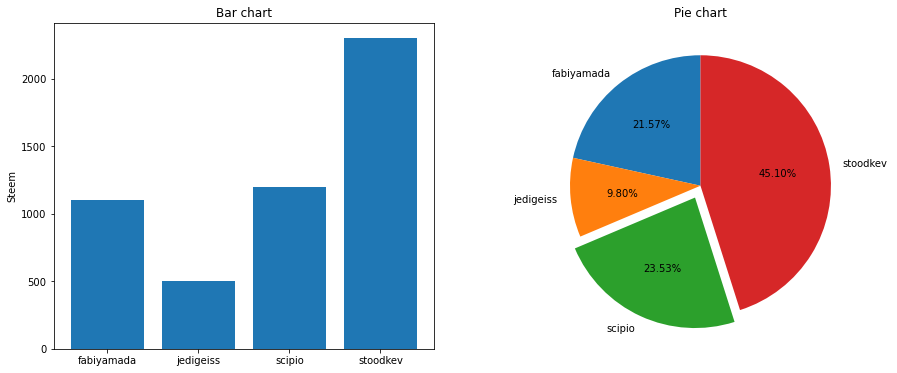

In [77]:
import matplotlib.pyplot as plt

fig = plt.figure(1, figsize=(15,6))

# bar chart example
accounts = ['fabiyamada', 'jedigeiss', 'scipio', 'stoodkev']
steem = [1100, 500, 1200, 2300]

plt.subplot(1,2,1)
plt.title('Bar chart')
plt.ylabel('Steem')
plt.bar(accounts, steem)

# pie chart example
labels = ['fabiyamada', 'jedigeiss', 'scipio', 'stoodkev']
perc = [steem[0]/sum(steem), # calculate percentages from the amount of steem
        steem[1]/sum(steem), # Pie chart ต้องทำกราฟเป็น เปอร์เซน เท่านั้น
        steem[2]/sum(steem), 
        steem[3]/sum(steem)]

explode = (0, 0, 0.1, 0)     # "explode" the 3rd slice ('Scipio')
                             # แยกส่วนที่ต้องการออกมา

plt.subplot(1,2,2)
plt.title('Pie chart')
plt.axis('equal')            # Make sure the pie is drawn as a circle, X and Y axes equally sized
plt.pie(perc, labels=labels, autopct='%1.2f%%', 
        startangle=90, explode=explode)

plt.show()

# 4. Load Data & Basic Data Preprocessing

In [78]:
import numpy as np
titanics = np.genfromtxt('/kaggle/input/titanic.txt',delimiter='\t',missing_values = None,dtype=str)

In [79]:
titanics[0,:]

array(['Passenger Class', 'Name', 'Sex', 'Age',
       'No of Siblings or Spouses on Board',
       'No of Parents or Children on Board', 'Ticket Number',
       'Passenger Fare', 'Cabin', 'Port of Embarkation', 'Life Boat',
       'Survived'], dtype='<U84')

In [80]:
titanics[:,3]

array(['Age', '29', '0.9167', ..., '26.5', '27', '29'], dtype='<U84')

In [81]:
titanics = np.delete(titanics,[1,6,7,8,9,10],1)

In [82]:
titanics[0,:]

array(['Passenger Class', 'Sex', 'Age',
       'No of Siblings or Spouses on Board',
       'No of Parents or Children on Board', 'Survived'], dtype='<U84')

In [83]:
rows, cols = np.where(titanics == None)
rows

array([], dtype=int64)

In [84]:
rows, cols = np.where(titanics == '')
np.unique(rows)

array([  16,   38,   41,   47,   60,   70,   71,   75,   81,  107,  108,
        109,  119,  122,  126,  135,  148,  153,  158,  167,  177,  180,
        185,  197,  205,  220,  224,  236,  238,  242,  255,  257,  270,
        278,  284,  294,  298,  319,  321,  364,  383,  385,  411,  470,
        474,  478,  484,  492,  496,  525,  529,  532,  582,  596,  598,
        673,  681,  682,  683,  706,  707,  757,  758,  768,  769,  776,
        790,  796,  799,  801,  802,  803,  805,  806,  809,  813,  814,
        816,  817,  820,  836,  843,  844,  853,  855,  857,  859,  866,
        872,  873,  875,  877,  880,  883,  887,  888,  901,  902,  903,
        904,  919,  921,  922,  923,  924,  927,  928,  929,  930,  931,
        932,  941,  943,  945,  946,  947,  949,  955,  956,  957,  958,
        959,  962,  963,  972,  974,  977,  983,  984,  985,  988,  989,
        990,  992,  994,  995,  998,  999, 1000, 1001, 1002, 1003, 1004,
       1005, 1006, 1007, 1010, 1013, 1014, 1015, 10

In [85]:
rows, cols = np.where(titanics == '')
print(str(len(np.unique(rows)))+" "+str(len(np.unique(cols))))

263 1


In [86]:
np.unique(cols)

array([2])

In [87]:
titanics = np.delete(titanics,2,1)
titanics[0,:]

array(['Passenger Class', 'Sex', 'No of Siblings or Spouses on Board',
       'No of Parents or Children on Board', 'Survived'], dtype='<U84')

In [88]:
passenger_class = np.unique(titanics[1:,0])
passenger_class

array(['First', 'Second', 'Third'], dtype='<U84')

In [89]:
passenger_class_value = [sum(titanics[:,0]==passenger_class[0]),
                         sum(titanics[:,0]==passenger_class[1]),
                         sum(titanics[:,0]==passenger_class[2]) ]
passenger_class_value

[323, 277, 709]

<BarContainer object of 3 artists>

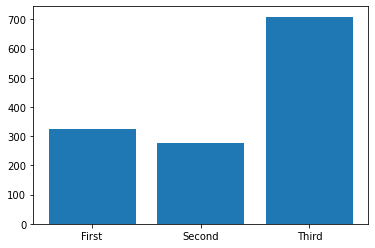

In [90]:
plt.bar(passenger_class, passenger_class_value)

# Ex1

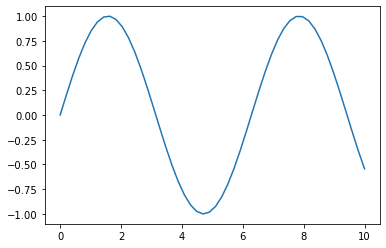

In [91]:
x = np.linspace(0,10)
y = np.sin(x)
plt.plot(x,y)
plt.show()

# Ex2

<BarContainer object of 2 artists>

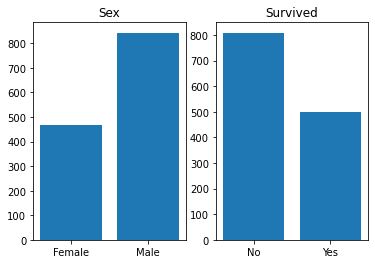

In [102]:
sex = np.unique(titanics[1:,1])
num = [sum(titanics[:,1]==sex[0]),
        sum(titanics[:,1]==sex[1])]
plt.subplot(1,2,1)
plt.title('Sex')
plt.bar(sex,num)

survive = np.unique(titanics[1:,4])
num2 =[sum(titanics[:,4]==survive[0]),
        sum(titanics[:,4]==survive[1])]
plt.subplot(1,2,2)
plt.title('Survived')
plt.bar(survive,num2)


In [99]:
titanics

array([['First', 'Female', '0', '0', 'Yes'],
       ['First', 'Male', '1', '2', 'Yes'],
       ['First', 'Female', '1', '2', 'No']], dtype='<U84')